In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from glob import glob
import pandas as pd
import pickle
import random
from PIL import Image
from glob import glob
import re
#from adjustText import adjust_text
import seaborn as sns
import statannot
import argparse
#import torch
import wandb
import sys
sys.path.append('../../modified_medsam_repo')
import MedSAM_HCP.utils_hcp

In [ ]:
def read_tag_from_wandb(tag, project_name, min_epoch_cutoff = 4):
    # read yolov7 runs
    api = wandb.Api()
    
    # Project is specified by <entity/project-name>
    runs = api.runs(path =f"nair-karthik00/{project_name}", filters = {'tags': tag})
    #runs.append(api.run('nair-karthik00/MedSAM_finetune_hcp_ya_second_round_with_bbox/a935xpc7'))

    summary_list, config_list, name_list = [], [], []
    id_seen = {}
    for run in runs:
        name = run.name
        #if not re.match(pattern, name):
        #    continue
        if run.id in id_seen.keys(): # sometimes wandb passes in the same run twice, so safeguard against this
            continue
        else:
            id_seen[run.id] = True
        
        
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files
        dicto = run.summary._json_dict
        if 'val_dice_scores/class_Unknown' not in dicto.keys() or dicto['epoch'] < min_epoch_cutoff: # this run is not finished yet
            print('skip ' + name.split('_')[0].split('label')[1])
            continue
        summary_list.append(dicto)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)


    runs_df = pd.DataFrame({
        "summary": summary_list,
        "config": config_list,
        "name": name_list
        })
    
    runs_df['label'] = [int(x.split('_')[0].split('label')[1]) for x in runs_df['name']]
    runs_df['val_dice_score'] = [x['val_dice_scores/class_Unknown']['max'] for x in runs_df['summary']]
    runs_df['num_samples_per_epoch'] = [x['num_training_samples'] / (x['epoch']+1) for x in runs_df['summary']]
    runs_df['num_samples_per_epoch'] = runs_df['num_samples_per_epoch'].astype(int)
    runs_df = runs_df.sort_values('label').reset_index(drop=True)
    ret_df = runs_df[['label', 'val_dice_score', 'num_samples_per_epoch']]

    #assert ret_df.shape[0] == 102
    assert ret_df['label'].value_counts().max() == 1
    
    return ret_df

In [26]:
# read yolov7 runs
api = wandb.Api()

# Project is specified by <entity/project-name>


In [46]:
runs = api.runs(path =f"nair-karthik00/singletask_unet",
    filters={"display_name": {"$regex": ".*frac0.1_lr0.0005.*_CE_loss.*"}})

tot = []
listo_labs = []
listo_val_dice = []
listo_method = []
for run in runs:
    
    dicto = run.summary._json_dict
    if('epoch' in dicto.keys() and dicto['epoch'] == 9):
        lab = int(run.name.split('_')[0].split('label')[1])

        listo_labs.append(lab)
        listo_val_dice.append(dicto['val_dice_score'])
        listo_method.append('CE')
        tot.append(run.name)


    

In [41]:
runs = api.runs(path =f"nair-karthik00/singletask_unet",
    filters={"tags": 'unet_final_main_run'})

for run in runs:
    dicto = run.summary._json_dict
    if('epoch' in dicto.keys() and dicto['epoch'] == 9):
        lab = int(run.name.split('_')[0].split('label')[1])

        listo_labs.append(lab)
        listo_val_dice.append(dicto['val_dice_score'])
        listo_method.append('DICE')
        tot.append(run.name)



NameError: name 'listo_labs' is not defined

In [36]:
len(tot)

57

### Generate some figures for making a diagram

In [5]:
np.unique(seg_arr)

array([   0,    2,    7,    8,   11,   12,   13,   14,   15,   16,   17,
         18,   26,   28,   30,   31,   41,   46,   47,   50,   51,   53,
         54,   58,   60,   62,   63,   77, 1000, 1007, 1009, 1011, 1012,
       1013, 1014, 1015, 1016, 1019, 1020, 1026, 1027, 1030, 1032, 1035,
       2000, 2007, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2019, 2020,
       2021, 2026, 2027, 2030, 2032, 2035])

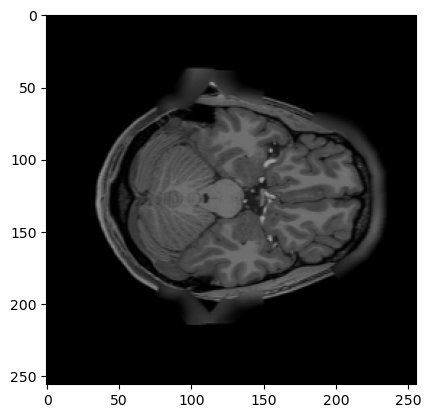

In [27]:
plt.imshow(im)

/tmp/ipykernel_2936556/1913570911.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots()


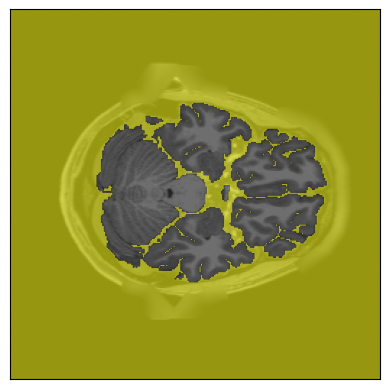

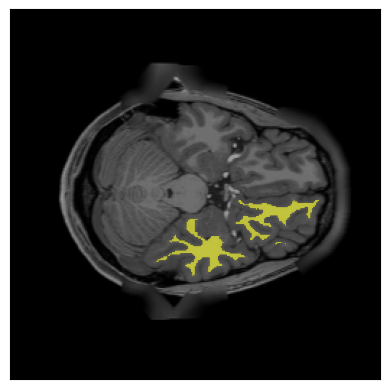

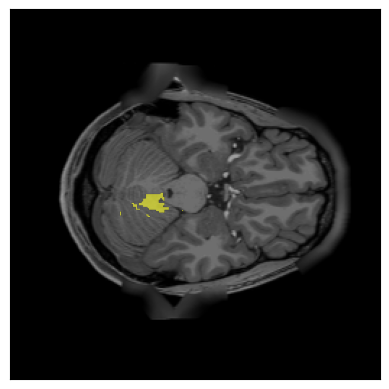

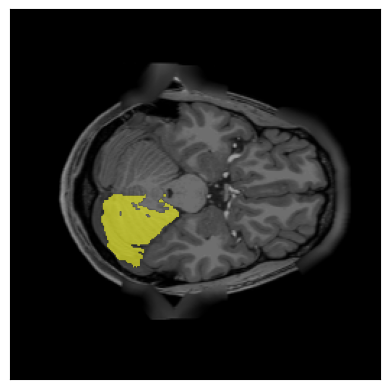

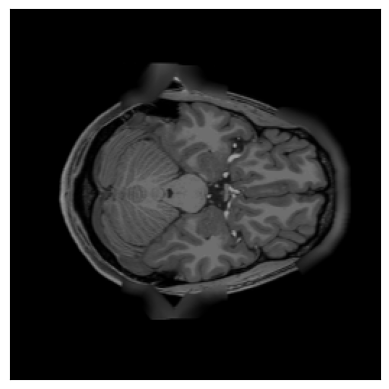

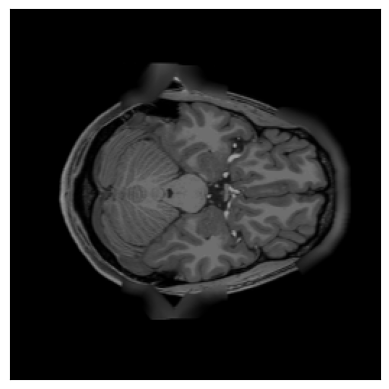

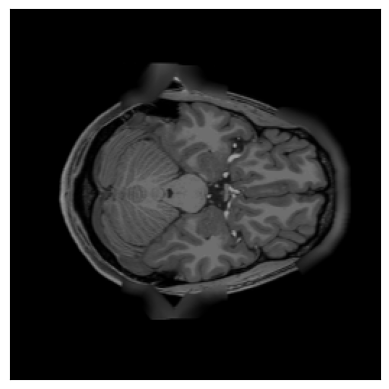

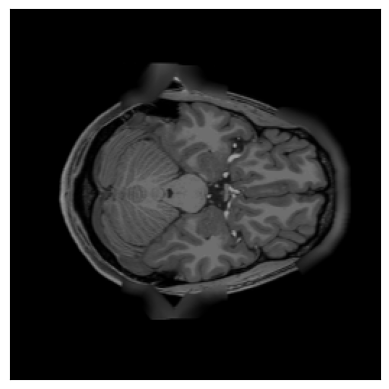

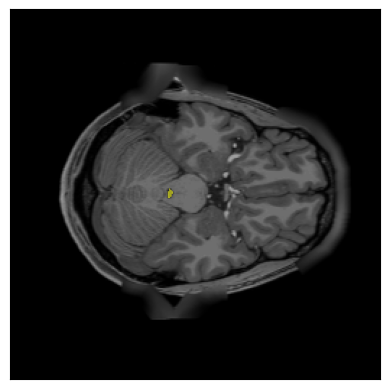

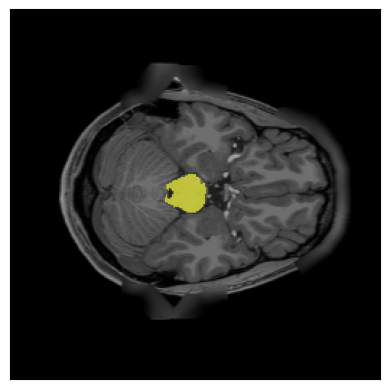

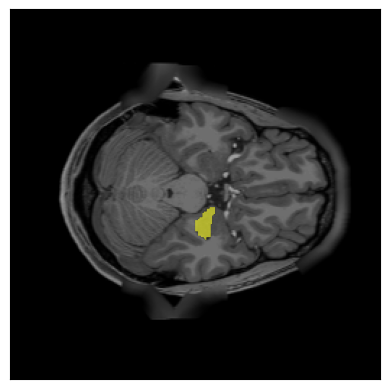

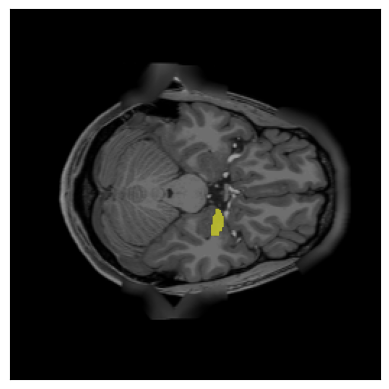

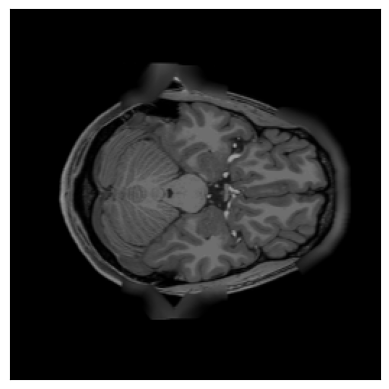

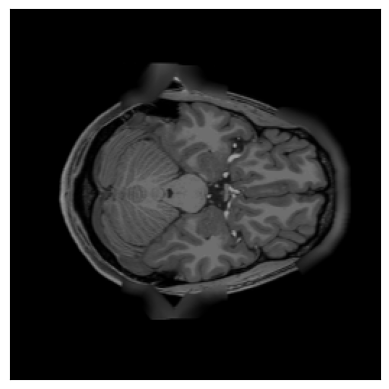

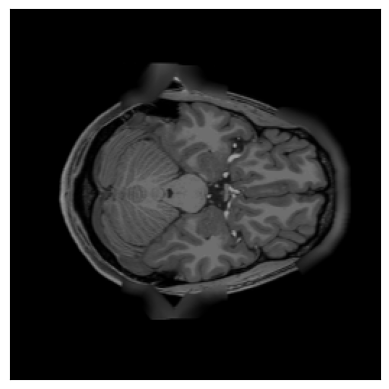

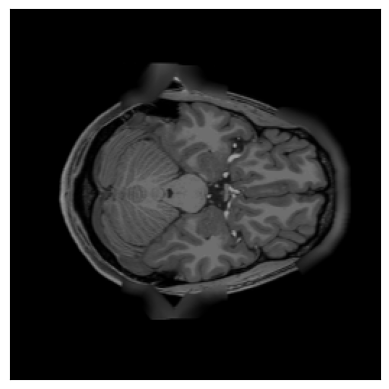

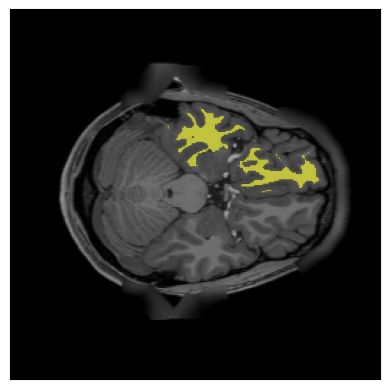

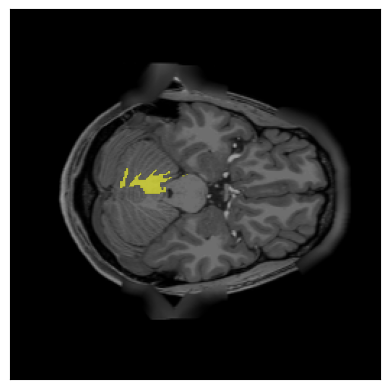

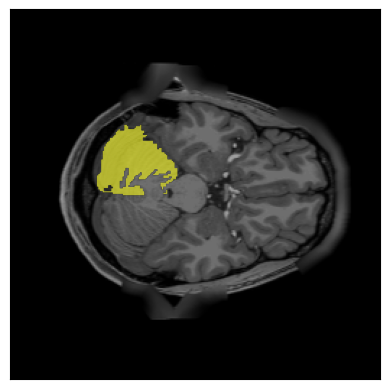

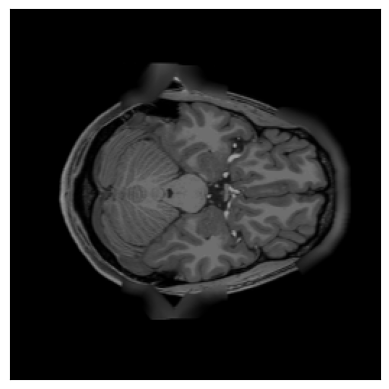

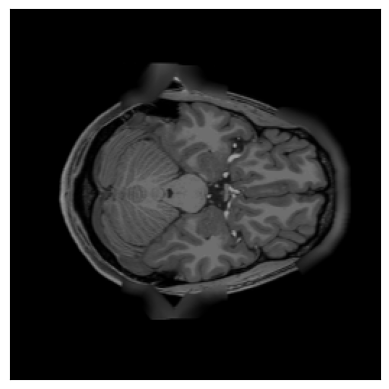

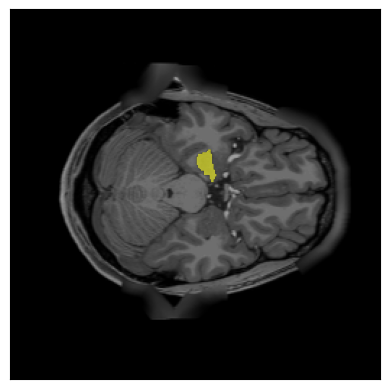

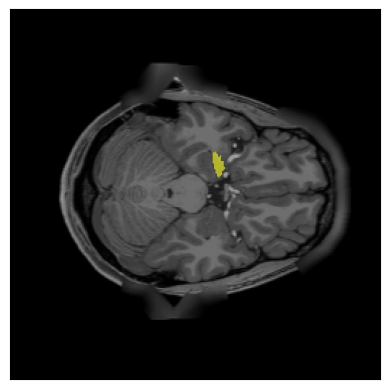

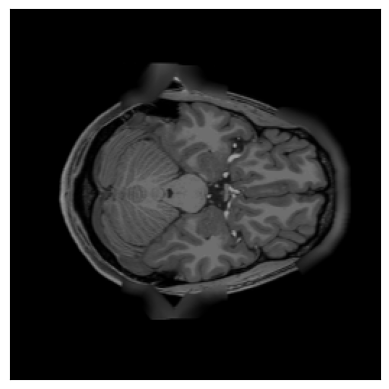

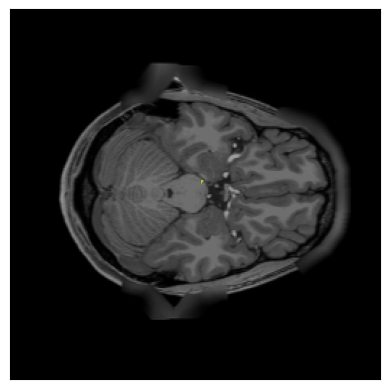

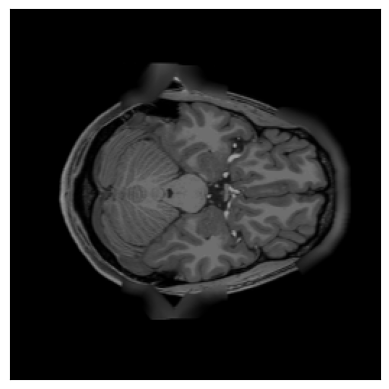

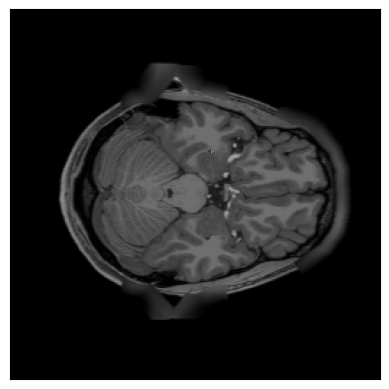

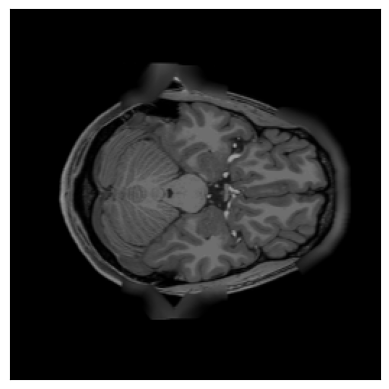

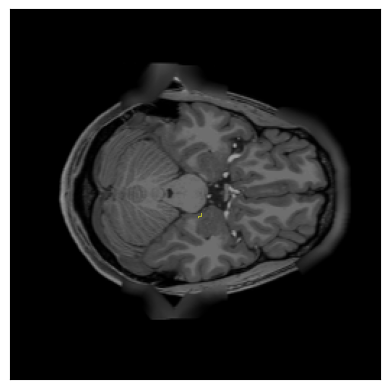

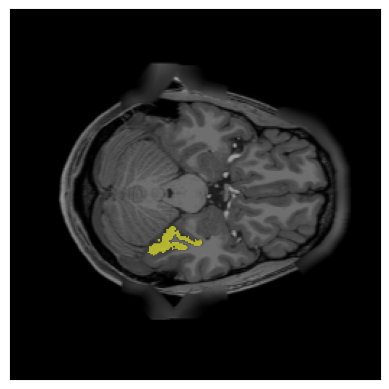

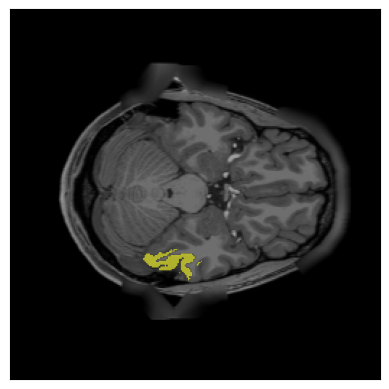

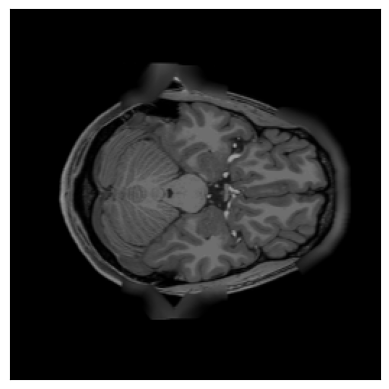

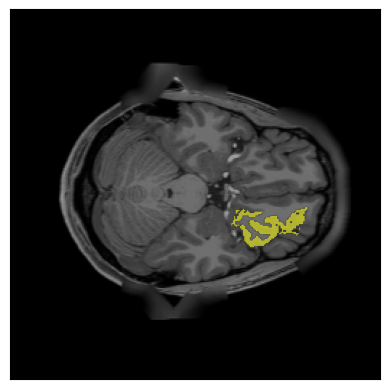

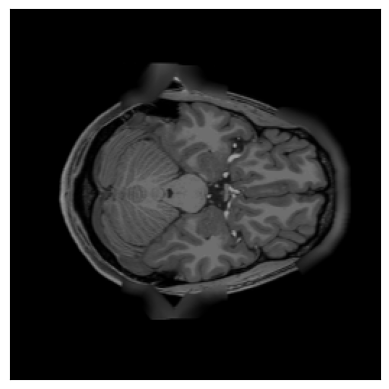

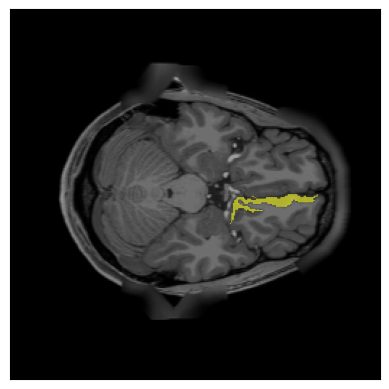

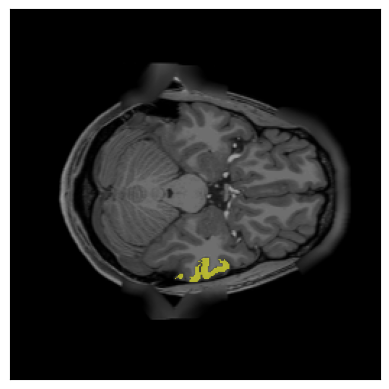

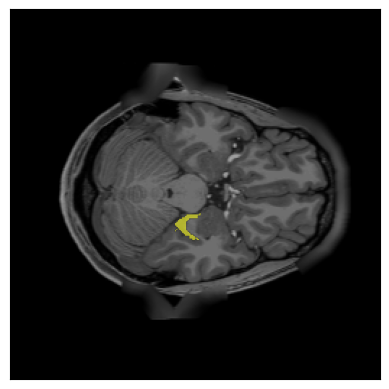

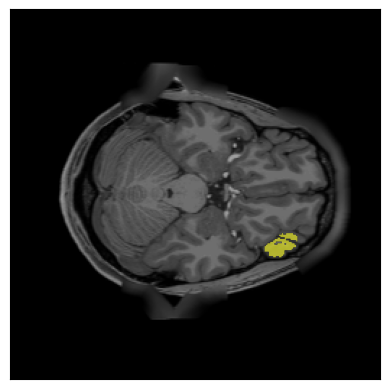

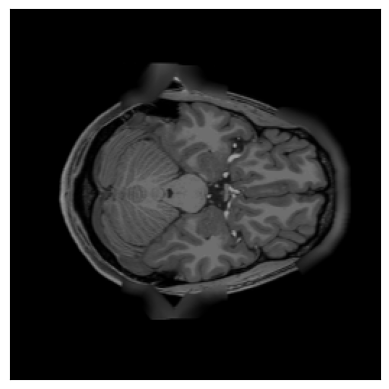

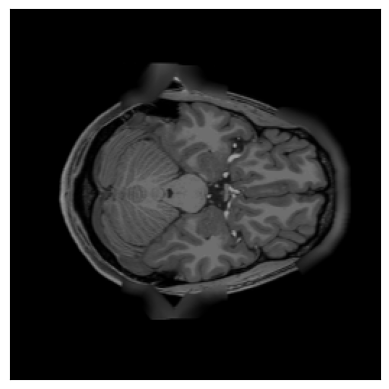

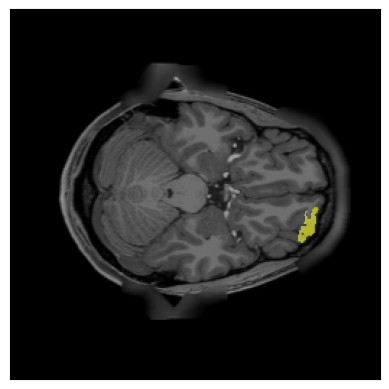

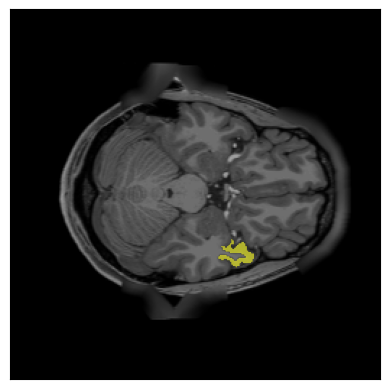

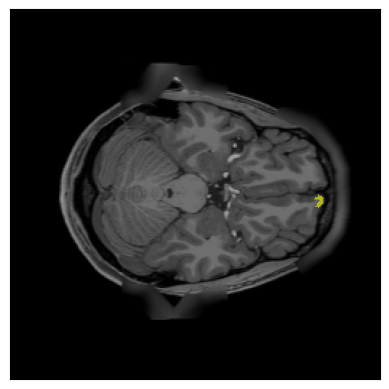

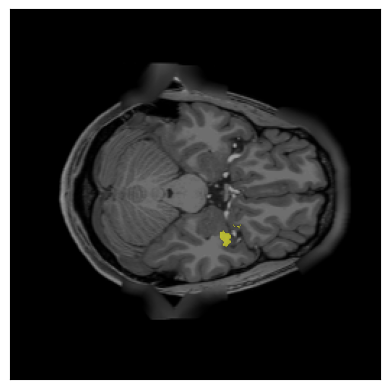

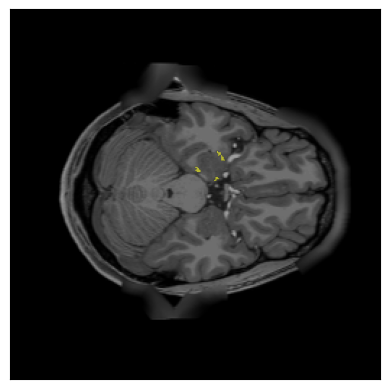

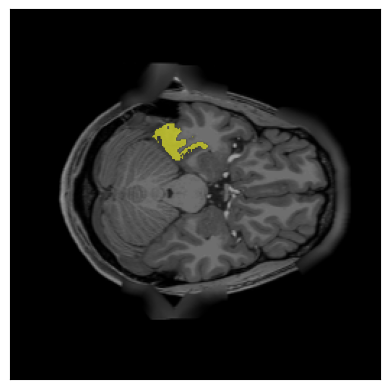

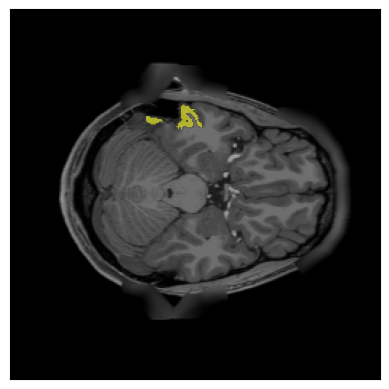

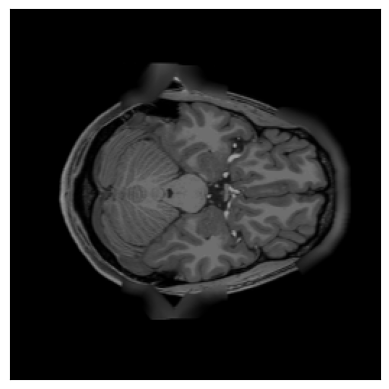

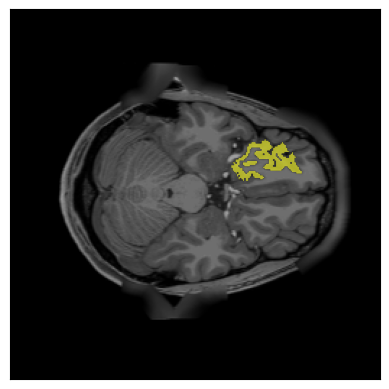

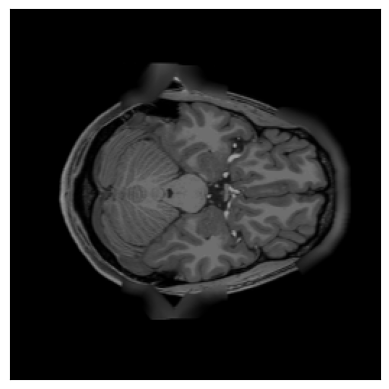

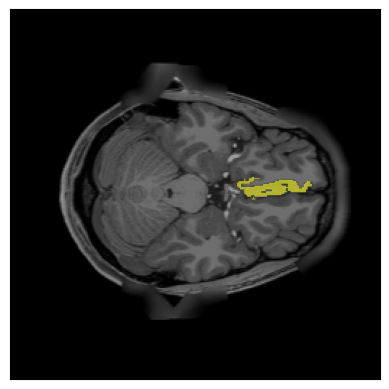

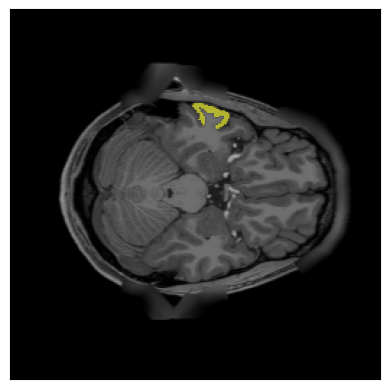

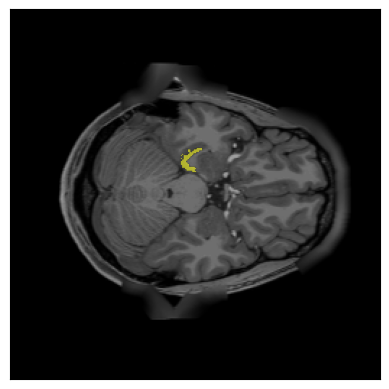

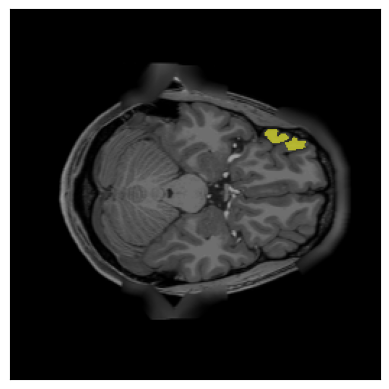

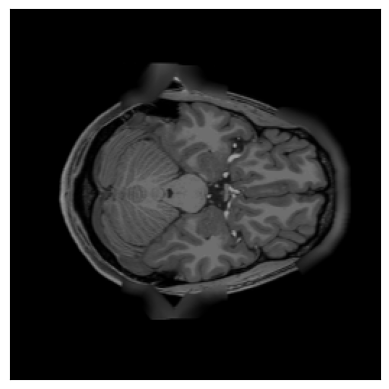

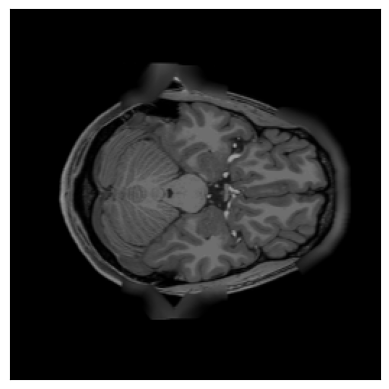

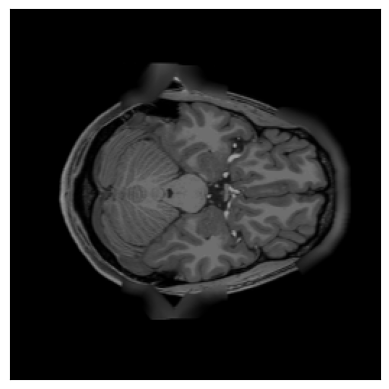

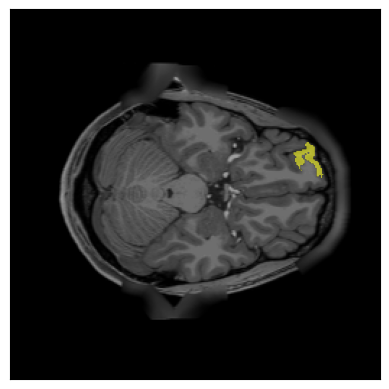

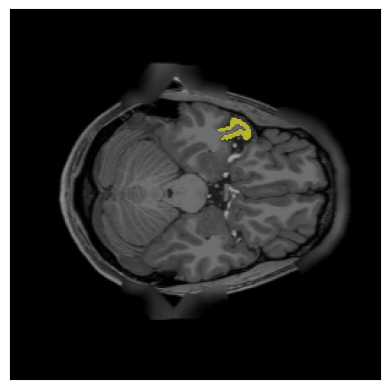

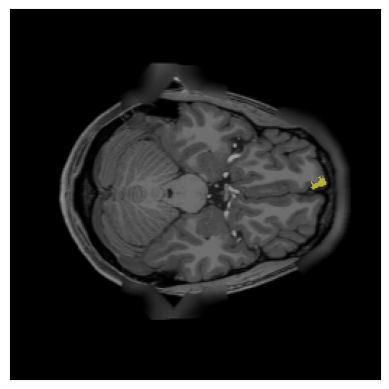

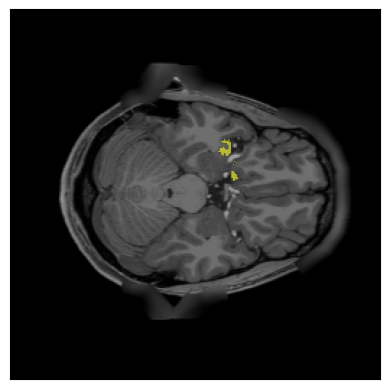

In [26]:
mri_id = 151425
slice_num=170
img_path = f'/gpfs/data/cbi/hcp/hcp_ya/hcp_ya_slices_npy/dir_structure_for_yolov7/val/images/{mri_id}_slice{slice_num}.png'
seg_path = f'/gpfs/data/cbi/hcp/hcp_ya/hcp_ya_slices_npy/segmentation_slices/{mri_id}/seg_{slice_num}.npy'
seg_arr = np.load(seg_path) # 256,256




labels = [   0,    2,    7,    8,   11,   12,   13,   14,   15,   16,   17,
         18,   26,   28,   30,   31,   41,   46,   47,   50,   51,   53,
         54,   58,   60,   62,   63,   77, 1000, 1007, 1009, 1011, 1012,
       1013, 1014, 1015, 1016, 1019, 1020, 1026, 1027, 1030, 1032, 1035,
       2000, 2007, 2009, 2011, 2012, 2013, 2014, 2015, 2016, 2019, 2020,
       2021, 2026, 2027, 2030, 2032, 2035]
with Image.open(img_path) as im:
    for label in labels:
        fig, axs = plt.subplots()
        axs.imshow(im)
        MedSAM_HCP.utils_hcp.show_mask(seg_arr == label, ax = axs)
        axs.set_xticks([])
        axs.set_yticks([])
    